# Calculating center to center distance

In [1]:
#!pip install packagename
# importing modules
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import os
from os import chdir as cd
import time
import fiona
# to calculate haversine distance 
# Haversine Distance can be defined as the angular distance between two locations on the Earth’s surface.
# !pip install haversine
# from haversine import haversine_vector, Unit


C:\Users\uttar\AppData\Local\Temp\ipykernel_19056\2049237555.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [4]:
# reading municipality data
# =========================================================
# loading the metopolitan statstistical areas from US Census
msa_2021 = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\tl_2021_us_cbsa.zip')
# Extracting MSAs in IL
# msa_IL = msa_2021[msa_2021['NAME'].str.contains('IL')]
msa_Metro = msa_2021[msa_2021['LSAD'] == 'M1'] 
msa_Metro.shape
# converting the coordinate system
msa_Metro = msa_Metro.to_crs(US_places.crs)

In [5]:
msa_2021.columns

Index(['CSAFP', 'CBSAFP', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD', 'MEMI', 'MTFCC',
       'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [6]:
# Cartographic boundary
msa_2020_cb = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\cb_2020_us_cbsa_5m.zip')
# msa_2020_cb.sort_values(by='NAME')

In [7]:
msa_2020_cb.columns

Index(['CSAFP', 'CBSAFP', 'AFFGEOID', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [8]:
msa_2020 = msa_2020_cb.merge(msa_2021[[ 'NAME', 'MEMI', 'MTFCC','INTPTLAT', 'INTPTLON']], on = 'NAME', )

In [9]:
# msa_2021.sort_values(by='NAME')

In [10]:
# Immigration data from migration policy institue
immigration_data = pd.read_csv(r'D:\Work\Box Sync\Trends_all states\Immigration data MPI\MPI_Immigration_data_2017_2021.csv')

In [11]:
# msa_immigration = msa_2021.merge(immigration_data, left_on = 'NAME', right_on = 'Metro')
msa_immigration = msa_2020.merge(immigration_data, left_on = 'NAME', right_on = 'Metro')
# msa_immigration

In [12]:
msa_immigration['Imm% tot pop'] = msa_immigration['Imm% tot pop'].str.rstrip('%').astype('float')
msa_immigration['Metro N Imm'] = [float(str(i).replace(",", "")) for i in msa_immigration['Metro N Imm']]
msa_immigration['Round immigrants'] = [float(str(i).replace(",", "")) for i in msa_immigration['Round immigrants']]
msa_immigration['Round total MSA population'] = [float(str(i).replace(",", "")) for i in msa_immigration['Round total MSA population']]
msa_immigration['Total Imm Pop_R'] = [float(str(i).replace(",", "")) for i in msa_immigration['Total Imm Pop_R']]

In [13]:
msa_immigration['Round immigrants'].max(), msa_immigration['Round immigrants'].min(), msa_immigration['Round immigrants'].mean()

(5883000.0, 2000.0, 77107.01754385965)

In [14]:
msa_2020.columns

Index(['CSAFP', 'CBSAFP', 'AFFGEOID', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'MEMI', 'MTFCC', 'INTPTLAT', 'INTPTLON'],
      dtype='object')

In [15]:
msa_immigration.rename(columns={'Imm% tot pop': '%ImmPop',
                                'Metro N Imm': 'noImm',
                                'Round total MSA population': 'msa_total',}, inplace=True)

msa_immigration[['CSAFP', 'CBSAFP', 'GEOID', 'Metro', 'NAMELSAD', 'LSAD', 'MEMI', 'MTFCC',
       'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       '%ImmPop', 'noImm', 'msa_total']].to_file(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\immigration_data.shp')

<AxesSubplot:>

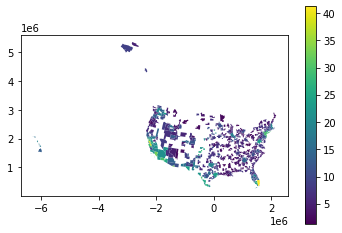

In [18]:
msa_immigration.to_crs('EPSG:5070').plot(column = '%ImmPop', legend = True)